 <img src="https://c02.purpledshub.com/uploads/sites/48/2024/05/solar-flare-10-may-2024.jpg?webp=1&w=1200" width="400">



> One intersting aspect of the Sun is its sunspots. Sunspots are areas where the magnetic field is about 2,500 times stronger than Earth's, much higher than anywhere else on the Sun. Because of the strong magnetic field, the magnetic pressure increases while the surrounding atmospheric pressure decreases. This in turn lowers the temperature relative to its surroundings because the conencentrated magnetic field inhibits the flow of hot, new gas from the Sun's interior to the surface.


>Sumspots tend to occur in pairs that have magnetic fields pointing in opposite directions. A typical spot consists of the dark region called the umbra, surrounded by a lighter region known as the peumbra. The sunspots appear relatively dark because the surrounding surface of the sun (the photospher) is about 10,000 degrees F., while the umbra is about 6,300 degrees F. Sunspots are quite large as an average size about the same size as the Earth.


>Sunspots increase and decrease, then again increases and decreases through an average cycle of 11 years. Solar cycle 1 was the first solar cycle since extensive recording of solar suspot activity began in 1755 and we have experienced a total of 24 full solar cycle since then. Currently, we are in 25th solar cycle, the solar cycle 25 began in December 2019 and is expected to last till more 11 years that is about 2030.


<div align="center">
<img src="
https://www.cosmos.esa.int/documents/519784/530468/Sunspot+case+web+image/e505728f-9b2a-4192-8ba3-3f6243a59b7b?t=1475670734908" width="400">
</div>






In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahoorshams","key":"2b5ec3a9e9700362b646e3b095c12b8d"}'}

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("robervalt/sunspots")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sunspots


In [9]:
import os

# path = "/root/.cache/kagglehub/datasets/robervalt/sunspots/versions/3"
path = "/kaggle/input/sunspots"

for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))

/kaggle/input/sunspots/Sunspots.csv


In [7]:
'''Visualization'''
import matplotlib.pyplot as plt
import seaborn as sns

'''Data Handeling and Linear Algebra'''
import pandas as pd
import numpy as np

'''Manipulating Data and Model Building'''
import tensorflow as tf

'''Ignore Warnings'''
import warnings
warnings.filterwarnings('ignore')

'''Change the plot style'''
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



In [12]:
# Take a look at the data
# data = pd.read_csv("/root/.cache/kagglehub/datasets/robervalt/sunspots/versions/3/Sunspots.csv")
data = pd.read_csv("/kaggle/input/sunspots/Sunspots.csv")
data.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [13]:
# Check the last year in the data
data.tail()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
3260,3260,2020-09-30,0.6
3261,3261,2020-10-31,14.4
3262,3262,2020-11-30,34.0
3263,3263,2020-12-31,21.8
3264,3264,2021-01-31,10.4


In [14]:
# General information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         3265 non-null   int64  
 1   Date                               3265 non-null   object 
 2   Monthly Mean Total Sunspot Number  3265 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 76.7+ KB


---
*   Total of 3265 months of data starting from january 1749 till january 2021
*   No null values found in the data
*   We are all set to extract our sunspots data from this dataframe and visulize it
---



In [15]:
# Last column ---> Sunspots data
# iloc means that from the sataframe, I want to extract the location.
# : means that I am extracting all the rows
# -1 referres to the last column
sunspots = data.iloc[:, -1]

# .values is goinig to convert that data in suspots into the numpy array
sunspots.values

array([ 96.7, 104.3, 116.7, ...,  34. ,  21.8,  10.4])

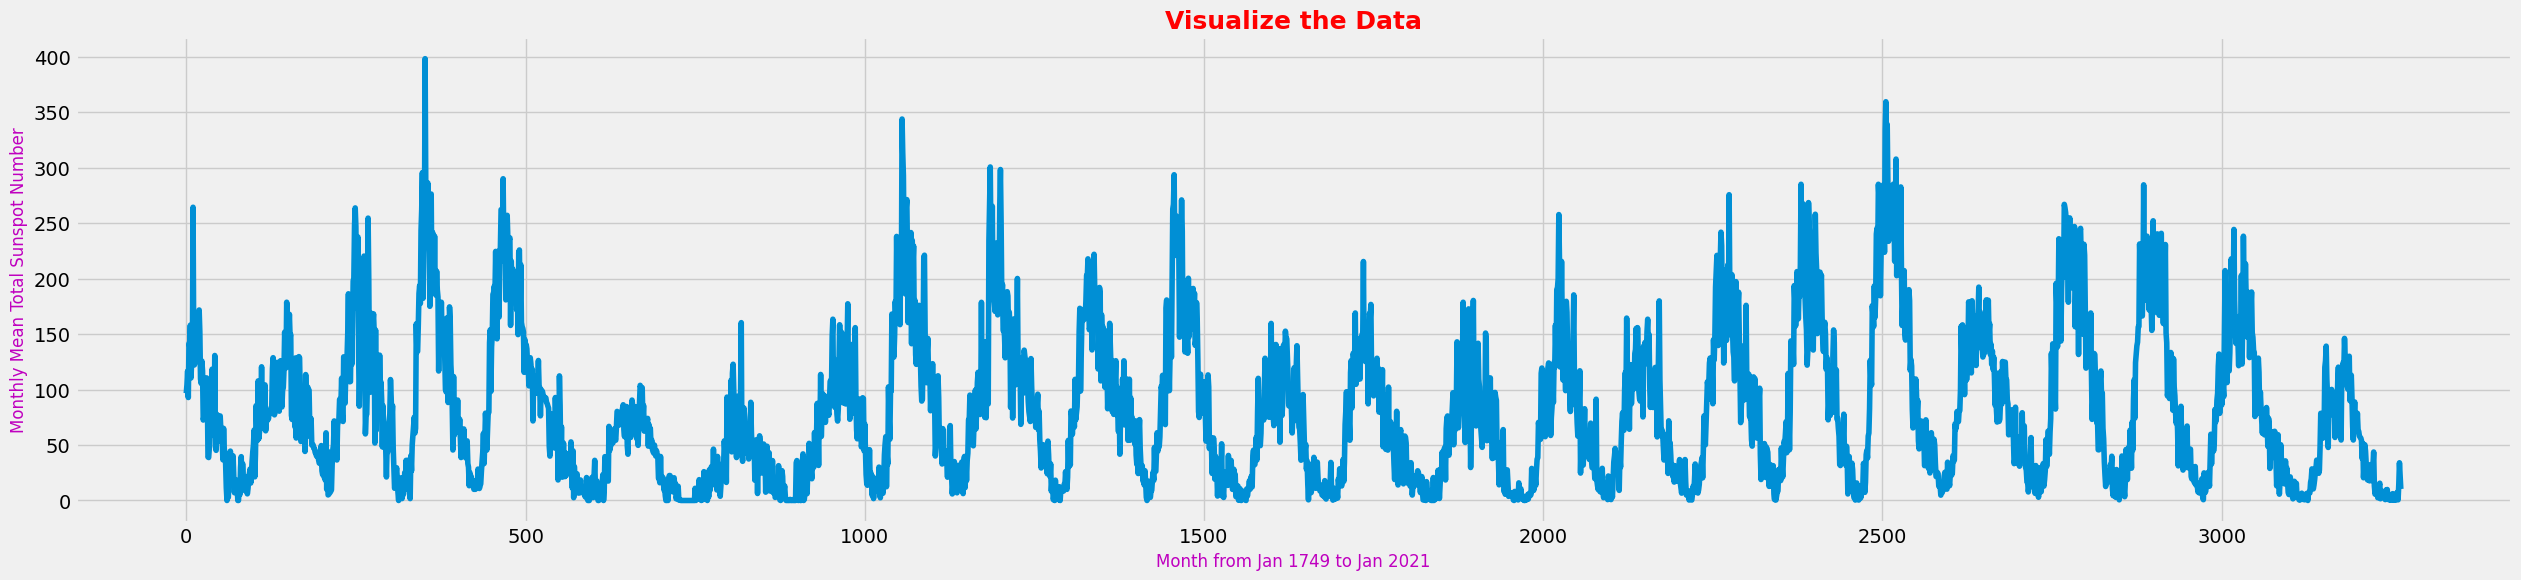

In [16]:
# Visualize the data
plt.figure(figsize=(28,6))
plt.plot(sunspots)
plt.ylabel(data.columns[-1], fontsize = 12, color = 'm')
plt.xlabel("Month from Jan 1749 to Jan 2021", fontsize = 12, color = 'm')
plt.title("Visualize the Data", fontsize = 18, color = 'r', weight = 'bold')
plt.show()

Remember ,
* The first solar cycle started from 1755 but out sunspots starts from 1749. That's a total of 6 years which means 72 months of data
* Hence, we can see the initial part of the graph decreasing to minimum till the first 72 months
* Each solar cycle lasts approx 11 years, that is about 132 months
* The current cycle is the solar cycle 25 which began in December 2019 but our data is till Jan 2021. That's about 13 months of data from the current cycle

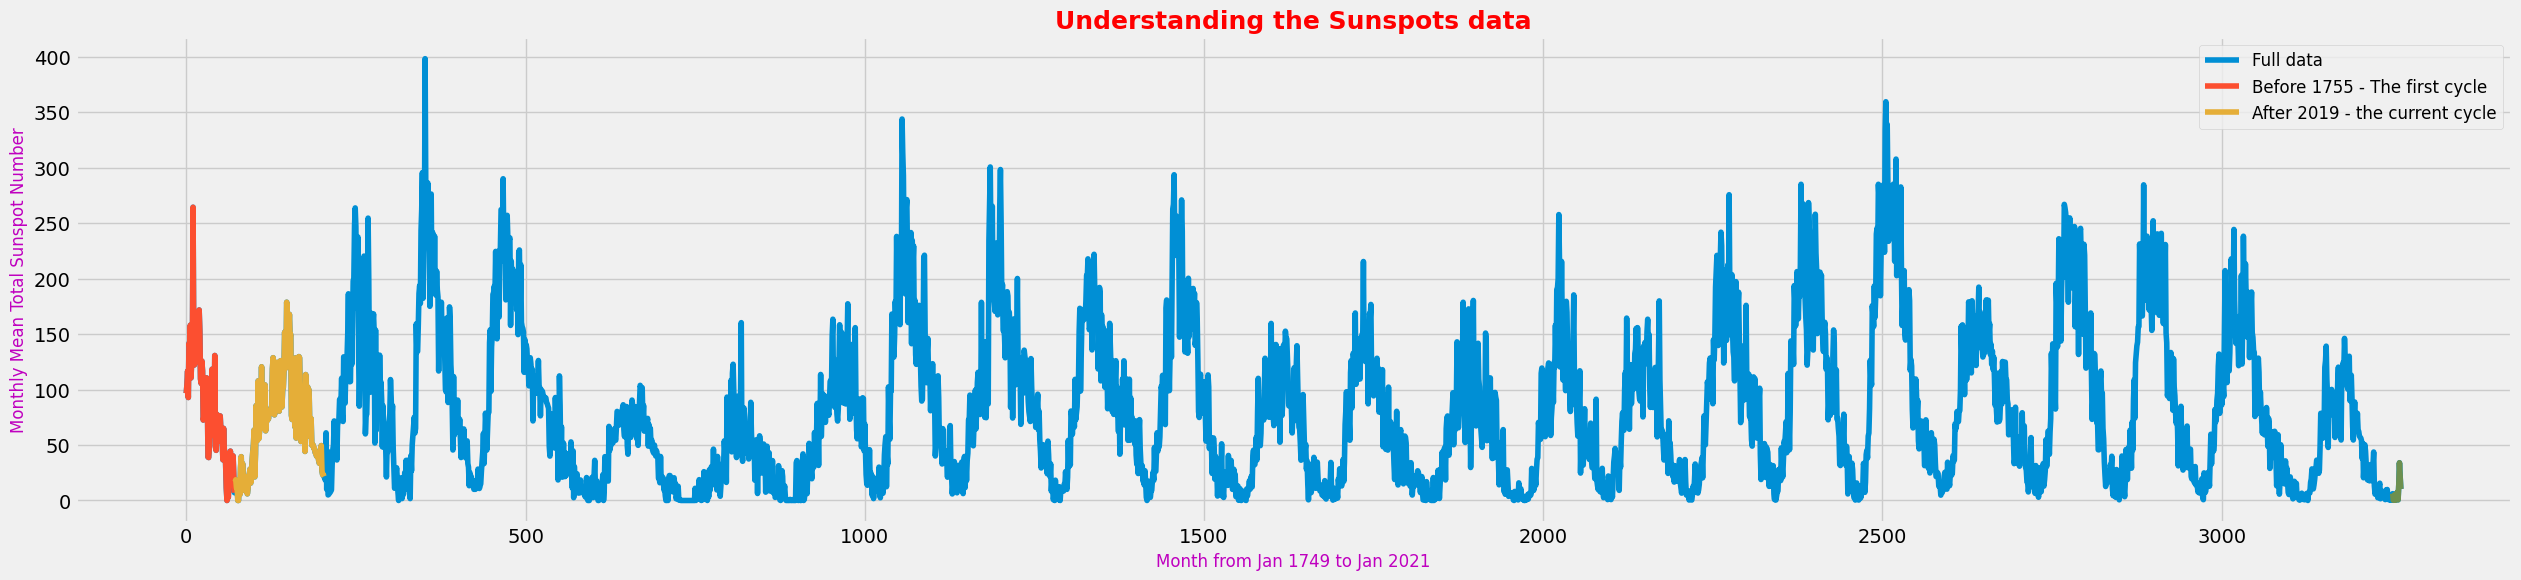

In [17]:
# Highlighting the above points in out plot
'''Approx 11 years cycle ---> approx 132 months cycle'''
plt.figure(figsize=(28,6))
plt.plot(sunspots)             # The whole data
plt.plot(sunspots[:72])        # Data from 1749, actual cycles started from 1755 ---> 6 years means 72 months
plt.plot(sunspots[72:72+132])  # Showing the first cycle
plt.plot(sunspots[-13:])       # Displaying the current cycle
plt.ylabel(data.columns[-1], fontsize = 12, color = 'm')
plt.xlabel("Month from Jan 1749 to Jan 2021", fontsize = 12, color = 'm')
plt.title("Understanding the Sunspots data", fontsize = 18, color = 'r', weight = 'bold')
plt.legend(["Full data", "Before 1755 - The first cycle", "After 2019 - the current cycle"], fontsize = 12)
plt.show()


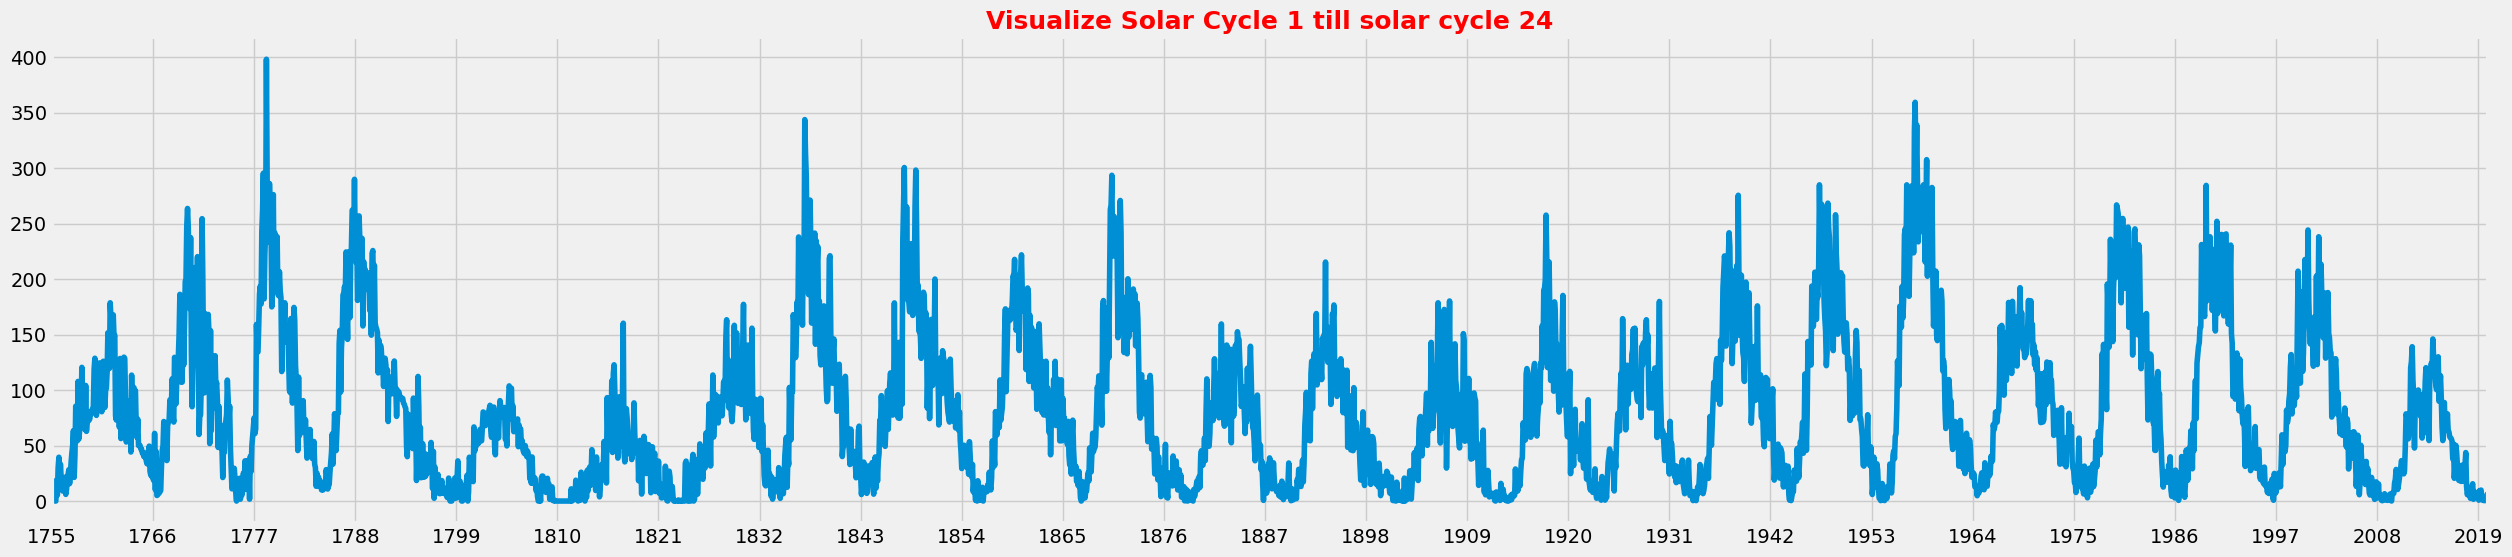

In [18]:
# Some changes for a better visualization of solar cycles
'''Collect all the years from 1755 to 2019 and use it as xticklabels'''
years = []
start = 1755
for i in range (0 , len(data.iloc[:, -1][72:]), 132):
  years.append(start)
  start += 11

plt.figure(figsize=(28,6))
plt.plot(sunspots[72:])
plt.title("Visualize Solar Cycle 1 till solar cycle 24", weight = 'bold', color = 'r', fontsize = 18)
plt.xlim(72, 3265-12)
plt.xticks(range(72, len(sunspots),132))
plt.gca().set_xticklabels(years)
plt.show()


---

* Here some data is not exactly as we expected. For example, look at the start of 4th solar cycle
* It acually started in 1784 rather than 1788 and lasted till 1798
* Hence, there is thsis mismatch. However, now we do understand this data a bit more clearly!
* Note that this is a noisy data! Some cycles have crazy values like around 400 whereas the maximum suspots ever recorded is 285 in March 1958 (Solar cycle - 19)
* Well, such sequence of data points indexed in time order is referred as the time series data

---

In [ ]:
!nvidia-smi

Sat Aug 23 06:51:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   56C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [12]:
!pip install nvcc4jupyter

In [ ]:
%load_ext nvcc4jupyter

Detected platform "Colab". Running its setup...
Source files will be saved in "/tmp/tmpqkidzwqq".


In [ ]:
%%cuda
#include <stdio.h>

__global__ void helloFromGPU() {
    printf("Hello from thread %d in block %d\n", threadIdx.x, blockIdx.x);
}

int main() {
    // Launch kernel: 2 blocks, 5 threads each
    helloFromGPU<<<2,5>>>();
    cudaDeviceSynchronize(); // wait for GPU to finish
    return 0;
}



In [ ]:
%%writefile hello.cu
#include <stdio.h>
#include <cuda_runtime.h>

__global__ void helloFromGPU() {
    printf("Hello from thread %d in block %d\n", threadIdx.x, blockIdx.x);
}

int main() {
    // Launch kernel: 2 blocks, 5 threads each
    helloFromGPU<<<2,5>>>();

    // Check for errors
    cudaError_t err = cudaGetLastError();
    if (err != cudaSuccess) {
        printf("CUDA Error: %s\n", cudaGetErrorString(err));
        return 1;
    }

    // Wait for GPU to finish
    cudaDeviceSynchronize();

    return 0;
}


Overwriting hello.cu


In [ ]:
!nvcc hello.cu -o hello
!./hello

CUDA Error: the provided PTX was compiled with an unsupported toolchain.


In [ ]:
%%cuda
#include <stdio.h>

__global__ void helloFromGPU() {
    printf("Hello from thread %d in block %d\n", threadIdx.x, blockIdx.x);
}

int main() {
    helloFromGPU<<<2,5>>>();
    cudaDeviceSynchronize();
    return 0;
}


In [ ]:
!nvidia-smi

Sat Aug 23 07:16:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!apt-get install -y cuda-toolkit-12-4

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cuda-cccl-12-4 cuda-command-line-tools-12-4 cuda-compiler-12-4 cuda-crt-12-4
  cuda-cudart-12-4 cuda-cudart-dev-12-4 cuda-cuobjdump-12-4 cuda-cupti-12-4
  cuda-cupti-dev-12-4 cuda-cuxxfilt-12-4 cuda-documentation-12-4
  cuda-driver-dev-12-4 cuda-gdb-12-4 cuda-libraries-12-4
  cuda-libraries-dev-12-4 cuda-nsight-12-4 cuda-nsight-compute-12-4
  cuda-nsight-systems-12-4 cuda-nvcc-12-4 cuda-nvdisasm-12-4
  cuda-nvml-dev-12-4 cuda-nvprof-12-4 cuda-nvprune-12-4 cuda-nvrtc-12-4
  cuda-nvrtc-dev-12-4 cuda-nvtx-12-4 cuda-nvvm-12-4 cuda-nvvp-12-4
  cuda-opencl-12-4 cuda-opencl-dev-12-4 cuda-profiler-api-12-4
  cuda-sanitizer-12-4 cuda-toolkit-12-4-config-common cuda-tools-12-4
  cuda-visual-tools-12-4 default-jre default-jre-headless fonts-dejavu-core
  fonts-dejavu-extra gds-tools-12-4 libatk-wrapper-java
  libatk-wrapper-java-jni libcublas-12-4

In [ ]:
!nvcc -arch=sm_75 hello.cu -o hello
!./hello

Hello from thread 0 in block 0
Hello from thread 1 in block 0
Hello from thread 2 in block 0
Hello from thread 3 in block 0
Hello from thread 4 in block 0
Hello from thread 0 in block 1
Hello from thread 1 in block 1
Hello from thread 2 in block 1
Hello from thread 3 in block 1
Hello from thread 4 in block 1


In [ ]:
# Using PyTorch CUDA
import torch

# Check GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Create vectors
n = 10_000
a = torch.randn(n, device=device)
b = torch.randn(n, device=device)

# Vector addition on GPU
c = a + b

# Print first 10 elements
print("First 10 results:", c[:10])


Using device: cuda
First 10 results: tensor([-0.0523, -1.3950, -0.8906, -0.6476,  1.1363, -0.6953, -0.9385,  1.3185,
        -0.6632, -1.9774], device='cuda:0')


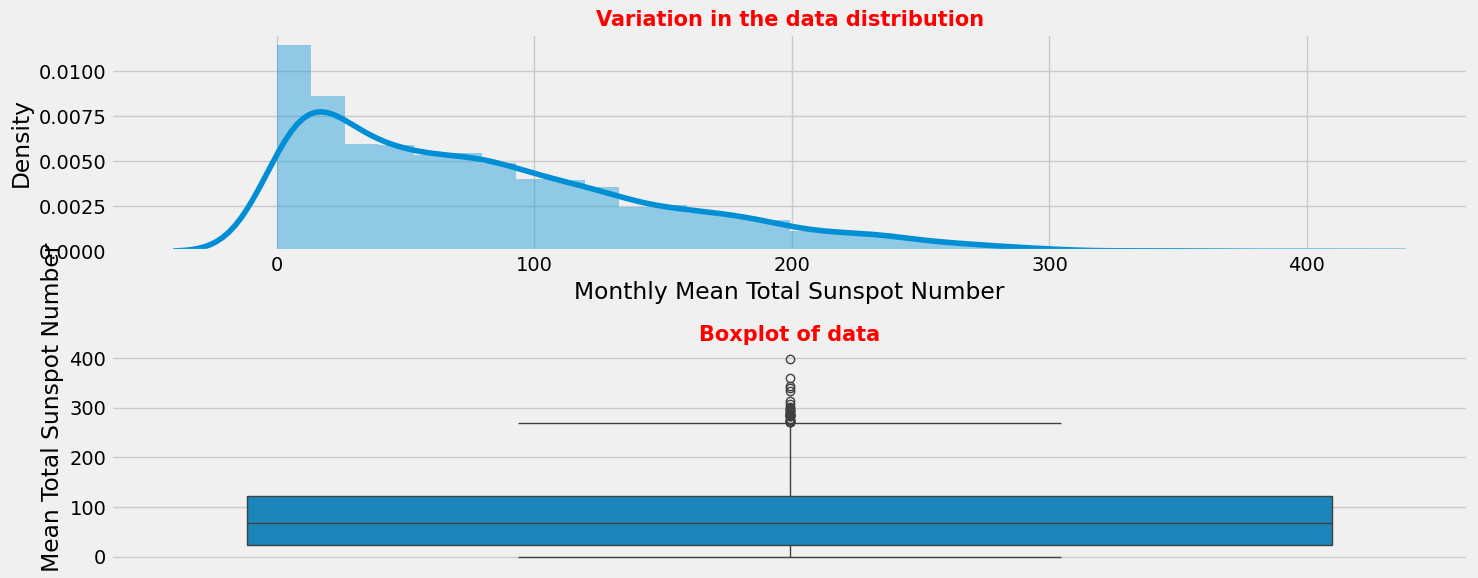

In [19]:
# Visualise the variation in the data distribution along with the outliers in the time series data
plt.figure(figsize =(15,6))
plt.subplot(2,1,1)
sns.distplot(sunspots)
plt.title("Variation in the data distribution", fontsize = 15, color = 'r', weight = 'bold')
plt.subplot(2,1,2)
sns.boxplot(sunspots)
plt.title("Boxplot of data", fontsize = 15, color = 'r', weight = "bold")
plt.tight_layout()
plt.show()

## Sequencing Models for time series data - RNN, LSTM

* When we want our model to remember information from the past we usually prefer to use - Recurrent Neural Networks

* It has a unique architecture in itself which helps it remember information from the past
* It processes input of sequences such that it always has some information from the past
* Below is an image showing the architecture of a RNN. We can clearly see that the weights from previous layers are shared with thenext layers!


<div align="center">
<img src="https://www.researchgate.net/profile/Weijiang-Feng/publication/318332317/figure/fig1/AS:614309562437664@1523474221928/The-standard-RNN-and-unfolded-RNN.png
" width="600">
</div>



* However, due to sharing of these weights while backpropagating through time these gradient multiplications causes high chances of vanishing gradients if any value become smaller
* To overcome this and retain information from past for longer period we are choosing LSTM (Long-Short Term Memory). It was constructed specifically to overcome vanishing gradients
* Here, the cell of LSTM is constructed with help of gates such that it can retain information for longer period of time.


<div align="center">
<img src="https://i.sstatic.net/aTDpS.png" width="600">
</div>

* One of the main disadvantage of using LSTM is that it consumes a lot of memory and time to train
* Hence, a new variant was invented about a decade ago in 2014, Gated Recurrent Unit aka GRU
* It consists of only two gates which means that over parameters in the model decreases which in turn decreases the time and memory to train.
* We are directly going to use LSTM for our project as the dataset we are using is small

#### RNN, LSTM, and GRU in one farme:-


<div align="center">
<img src="https://images.ctfassets.net/8r8i0zgzl3nn/7wQ6K5L5mRjGw7A413OceF/feb8249b56f09afaa4b564255ba9051e/introduction-to-rnns-image-7.png" width="800">
</div>

# Preparing functions for generating sequences of data and forecasting

**LSTM expects a 3D input as following:-**
* (batch size, sequence length, number of features)


<div align="center">
<img src="https://www.researchgate.net/profile/Bernard-Benson/publication/341502672/figure/fig17/AS:998926190649344@1615173971540/Sliding-window-method-illustrated-with-an-example-sequence-of-numbers-from-1-through-10.ppm" width="800">
</div>



<div align="center">
<img src="https://substackcdn.com/image/fetch/$s_!XF89!,f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F8d718467-ed15-4390-95b6-62ed943f51c0_880x208.gif" width="800">
</div>
